In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model, Sequential
from DataGenerator import DataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from datetime import datetime
import itertools
import os
from ConfusionMatrix import ConfusionMatrix
from sklearn.utils import class_weight
import math

In [2]:
# Loading data
X_test = np.load('./datasets/CNN/X_test_no_edge_frames.npy')
y_test = np.load('./datasets/CNN/y_test_no_edge_frames.npy')
y_train = np.load('./datasets/CNN/y_train_no_edge_frames.npy')

X_test_subset = np.load('./datasets/CNN/X_test_no_edge_frames_subset.npy')
y_test_subset = np.load('./datasets/CNN/y_test_no_edge_frames_subset.npy')
y_train_subset = np.load('./datasets/CNN/y_train_no_edge_frames_subset.npy')

In [3]:
counts = np.array(pd.Series(np.argmax(y_train_subset, axis=1)).value_counts().sort_index())

In [4]:
counts

array([1225, 2788, 1321, 3303, 1660, 2984, 1871])

In [5]:
def create_class_weight(values, mu=0.15):
    total = np.sum(values)
    print(total)
    class_weight = []

    for value in values:
        score = math.log(mu*total/float(value))
        print(score)
        class_weight.append(score if score > 1.0 else 1.0) 

    return class_weight

In [6]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(np.argmax(y_train_subset, axis=1)),
                                                 np.argmax(y_train_subset, axis=1))

In [7]:
class_weights

array([1.76699708, 0.7763886 , 1.63858549, 0.65533498, 1.30395869,
       0.72539257, 1.15690616])

In [3]:
test_gen = DataGenerator(X_test, y_test, 128)

test_gen_subset = DataGenerator(X_test_subset, y_test_subset, 128)

In [20]:
# load model
# model1 = load_model('./models/CNN_no_edge_frames_2020_01_20.h5')
# model2 = load_model('./models/CNN_no_edge_frames_data_aumengtation_2020_01_21.h5')
# model3 = load_model('./models/CNN_no_edge_frames_data_augmentation_2020_01_21_10:30.h5')
model4 = load_model('./models/CNN_no_edge_frames_2020-01-22-00:54:48.h5')

In [21]:
# result_1 = model1.predict_generator(test_gen)

# result_2 = model2.predict_generator(test_gen_subset)

# result_3 = model3.predict_generator(test_gen_subset)

result_4 = model4.predict_generator(test_gen_subset)

In [6]:
df_annot = pd.read_csv('../Annotations/processedAnnotations_no_corrupted_videos.csv')

In [7]:
count = df_annot.groupby(['CM']).count()['palavra']
threshold = 20

In [8]:
def replaceClass(cg):
    quantity = count[cg]
    if (quantity <= threshold):
        return 'others'
    else:
        return cg


df_annot['classe'] = df_annot['CM'].map(replaceClass)
df_annot['classe'] = df_annot['classe'].astype('category')

In [9]:
mostfreq = count.sort_values(ascending=False)[:7]

In [10]:
labels = np.array(mostfreq.index)

In [23]:
cm = ConfusionMatrix(y_test_subset, result_4, labels)

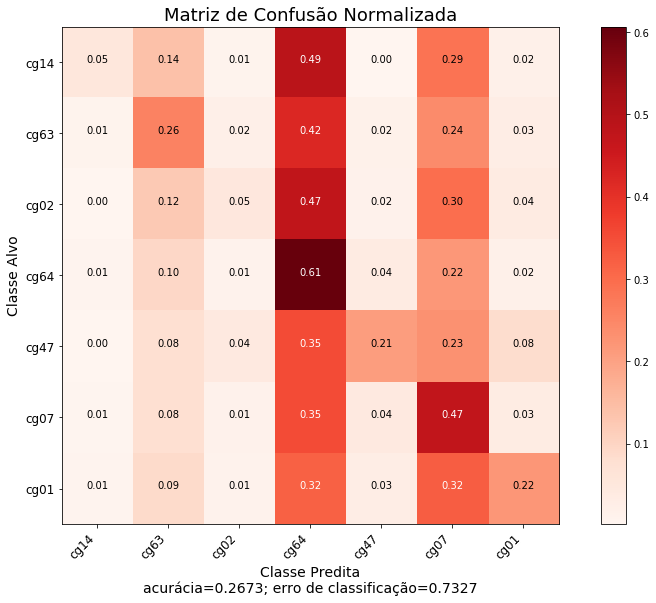

In [24]:
cm.plotFigure(normalize=True, show_annotations=True)

In [19]:
cm.saveFigure(figname='confusion_matrix_model_2020-01-22-01:50:34')

<Figure size 432x288 with 0 Axes>

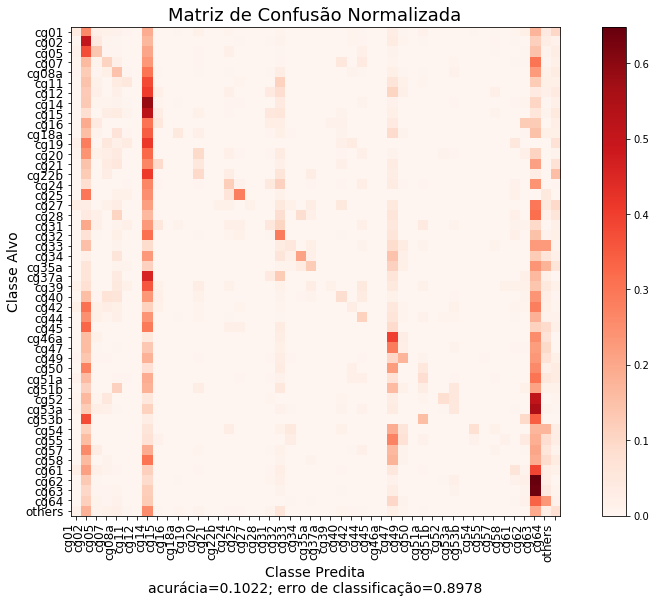

<Figure size 432x288 with 0 Axes>

In [29]:
plot_confusion_matrix(cm, df_annot['classe'].astype('category').cat.categories.values, figname='confusion_matrix_model_2020_01_20_48_classes', normalize=True, figsize=(12,8))